# Implementing a multi-level perceptron for MNIST using Fastaiv2

In [1]:
from fastai.vision.all import *
import fastbook
fastbook.setup_book()

* Go to kaggle/your account and download API key (JSON)
* Use `kaggle competitions download -c digit-recognizer` to download the dataset
* Next, use `file_extract` to unzip the downloaded set and save to a 'destination`
  * Note that `file_extract` doesn't return a `pathlib` object like `untar_data`

In [2]:
import pandas as pd

*path_dir_train* is the path where the `train.csv` and `test.csv` are downloaded

In [3]:
path_dir = "/home/sameer/ML/fastai/course/digit-recognizer"
train_x = pd.read_csv(os.path.join(path_dir, "train.csv"))
test_x = pd.read_csv(os.path.join(path_dir, "train.csv"))

Normalize pixel values and convert the dataframes to `Tensor` objects

In [4]:
train_x_tensor = (tensor(train_x.iloc[:, 1:]).float())/255
train_y_tensor = (tensor(train_x['label']).long()).unsqueeze(1)
test_x_tensor = (tensor(test_x).float())/255

Create a training dataset of the form `tuple(x, label)` and split it into `train` and `valid` sets

In [5]:
dataset = list(zip(train_x_tensor, train_y_tensor.view(-1)))
print(f"Output: Number of examples in the dataset = {len(dataset)}")
train, valid = torch.utils.data.random_split(dataset, [40000, 2000])

Output: Number of examples in the dataset = 42000


Create `DataLoader` objects that will be used for training

In [6]:
train_dl = DataLoader(train, batch_size=16, shuffle = True)
valid_dl = DataLoader(valid, batch_size=16, shuffle = True)

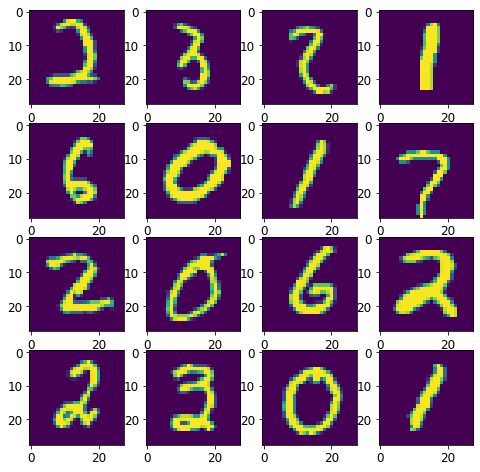

In [16]:
xa, ya = first(train_dl)
ax = plt.figure(figsize=(8,8))
for i in range(xa.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(xa[i].view(28, 28))   

Define a `Multi-layered Perceptron`

In [17]:
class multi_perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 512, bias=True) 
        self.lin2 = nn.Linear(512, 256, bias=True)
        self.lin3 = nn.Linear(256, 10, bias=True)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        return self.lin3(x)

In [18]:
dls = DataLoaders(train_dl, valid_dl)

In [19]:
learn_1 = Learner(dls, model=multi_perceptron(), opt_func=SGD, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

SuggestedLRs(lr_min=0.13182567358016967, lr_steep=0.6309573650360107)

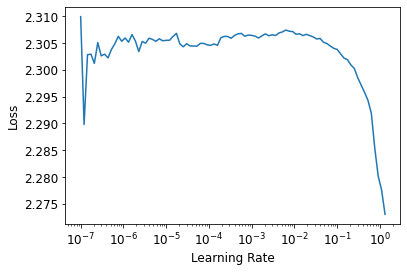

In [20]:
learn_1.lr_find()

In [22]:
learn_1.fit(40, lr = 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.165877,0.119238,0.966500,00:17
1,0.086494,0.120787,0.963000,00:16
2,0.071545,0.109930,0.969000,00:18
3,0.035580,0.111018,0.966500,00:19
4,0.035570,0.097979,0.973500,00:18
5,0.019714,0.106780,0.977000,00:16
6,0.016183,0.092957,0.980000,00:16
7,0.011110,0.118100,0.973500,00:16
8,0.018266,0.105779,0.980000,00:15
9,0.004045,0.109593,0.977000,00:16


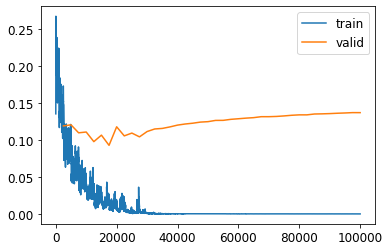

In [23]:
learn_1.recorder.plot_loss()